# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd 

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [2]:
# loading the data:
customers = pd.read_csv('../Wholesale customers data.csv')

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [3]:
# Your code here:
customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
# Your observations here

In [5]:
'''
1) FRESH: annual spending (m.u.) on fresh products (Continuous);
2) MILK: annual spending (m.u.) on milk products (Continuous);
3) GROCERY: annual spending (m.u.)on grocery products (Continuous);
4) FROZEN: annual spending (m.u.)on frozen products (Continuous)
5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)
6) DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);
7) CHANNEL: customersâ€™ Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal)
8) REGION: customersâ€™ Region â€“ Lisbon, Oporto or Other (Nominal)

REGION Frequency
Lisbon 77
Oporto 47
Other Region 316
Total 440

CHANNEL Frequency
Horeca 298
Retail 142
Total 440
'''

'\n1) FRESH: annual spending (m.u.) on fresh products (Continuous);\n2) MILK: annual spending (m.u.) on milk products (Continuous);\n3) GROCERY: annual spending (m.u.)on grocery products (Continuous);\n4) FROZEN: annual spending (m.u.)on frozen products (Continuous)\n5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)\n6) DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);\n7) CHANNEL: customersâ€™ Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal)\n8) REGION: customersâ€™ Region â€“ Lisbon, Oporto or Other (Nominal)\n\nREGION Frequency\nLisbon 77\nOporto 47\nOther Region 316\nTotal 440\n\nCHANNEL Frequency\nHoreca 298\nRetail 142\nTotal 440\n'

In [6]:
customers.dtypes #no categorical data to convert. great!

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [7]:
customers.isnull().sum() #no missing values to handle. great!

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [8]:
customers_corr = customers.corr()
customers_corr

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


In [9]:
heatmap = customers_corr.style.background_gradient(cmap='RdYlGn',axis=None).set_precision(2)
heatmap #no high correlations (column collinearity) that worth to be dropped

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1,0.062,-0.17,0.46,0.61,-0.2,0.64,0.056
Region,0.062,1,0.055,0.032,0.0077,-0.021,-0.0015,0.045
Fresh,-0.17,0.055,1,0.1,-0.012,0.35,-0.1,0.24
Milk,0.46,0.032,0.1,1,0.73,0.12,0.66,0.41
Grocery,0.61,0.0077,-0.012,0.73,1,-0.04,0.92,0.21
Frozen,-0.2,-0.021,0.35,0.12,-0.04,1,-0.13,0.39
Detergents_Paper,0.64,-0.0015,-0.1,0.66,0.92,-0.13,1,0.069
Delicassen,0.056,0.045,0.24,0.41,0.21,0.39,0.069,1


In [10]:
customers.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


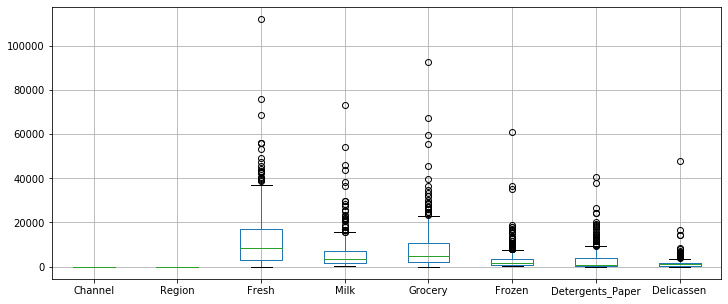

In [11]:
#check for outliers - there are some indeed
customers.boxplot(figsize=(12,5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12029a278>,
      dtype=object)

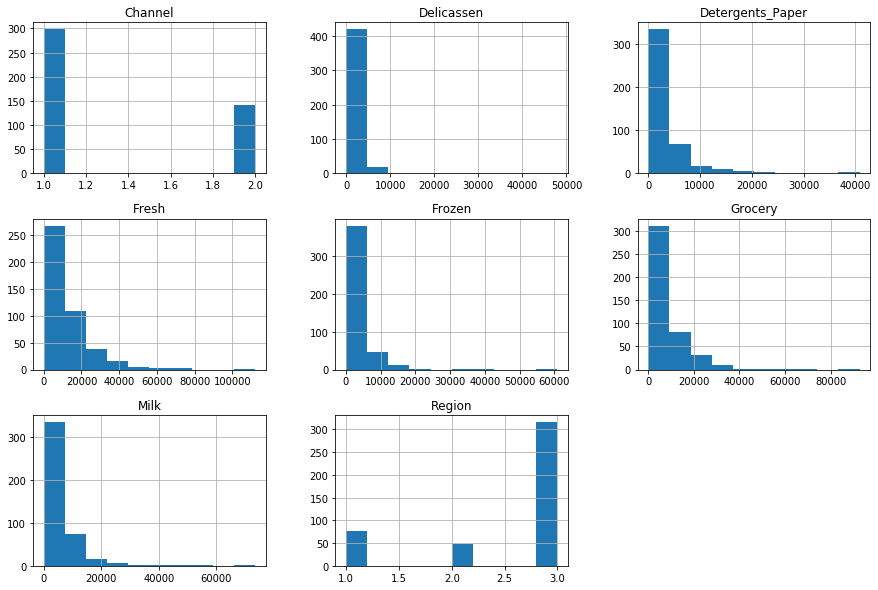

In [12]:
customers.hist(bins=10, figsize=(15,10))

In [13]:
#is the distribution of each of the bought goods skewed?
from scipy.stats import skew
'''
skewness = 0 : normally distributed.
skewness > 0 : more weight in the left tail of the distribution.
skewness < 0 : more weight in the right tail of the distribution. 
'''

print('Skewness of Fresh : ', skew(customers.Fresh)) 
print('Skewness of Milk : ', skew(customers.Milk)) 
print('Skewness of Grocery : ', skew(customers.Grocery)) 
print('Skewness of Frozen : ', skew(customers.Frozen)) 
print('Skewness of Detergents_Paper : ', skew(customers.Detergents_Paper)) 
print('Skewness of Delicassen : ', skew(customers.Delicassen)) 

#the distribution of all the goods is left skewed.

Skewness of Fresh :  2.5525826879071585
Skewness of Milk :  4.039922122788577
Skewness of Grocery :  3.5751872200807875
Skewness of Frozen :  5.887825728957787
Skewness of Detergents_Paper :  3.6194575783115934
Skewness of Delicassen :  11.113533648709097


# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [14]:
# Your code here
'''
Maybe I should remove some outliers
'''

'\nMaybe I should remove some outliers\n'

In [15]:
# Your comment here

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [16]:
# Your import here:
from sklearn.preprocessing import StandardScaler

# Your code here:
scaler = StandardScaler()
customers_scale = scaler.fit_transform(customers)

In [17]:
customers_scale.describe()
'''
The above code transformed the dataframe into a numpy.ndarray.
I was trying to describe it so I could see the differences between customer and customers_scale, if it was
really scalled. But I can't do describe() to a numpy array. Why it was converted to a np array?
'''

AttributeError: 'numpy.ndarray' object has no attribute 'describe'

# Challenge 3 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [18]:
# Your code here:
from sklearn.cluster import KMeans

cluster = KMeans(n_clusters=3, random_state=0, n_jobs=-1) #how many clusters should I do?
model = cluster.fit(customers_scale)
customers["labels_KMEAN"] = model.labels_

In [19]:
customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels_KMEAN
0,2,3,12669,9656,7561,214,2674,1338,1
1,2,3,7057,9810,9568,1762,3293,1776,1
2,2,3,6353,8808,7684,2405,3516,7844,1
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,1


Count the values in `labels`.

In [20]:
# Your code here:
customers["labels_KMEAN"].value_counts() #3 types of customers I guess; there are more of type 0 and less of type 2

0    297
1    130
2     13
Name: labels_KMEAN, dtype: int64

# Challenge 4 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [21]:
# Your code here
from sklearn.cluster import DBSCAN
cluster = DBSCAN(eps=0.4)
model = cluster.fit(customers_scale)
customers["labels_DBSCAN"] = model.labels_

In [22]:
customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels_KMEAN,labels_DBSCAN
0,2,3,12669,9656,7561,214,2674,1338,1,-1
1,2,3,7057,9810,9568,1762,3293,1776,1,-1
2,2,3,6353,8808,7684,2405,3516,7844,1,-1
3,1,3,13265,1196,4221,6404,507,1788,0,-1
4,2,3,22615,5410,7198,3915,1777,5185,1,-1


Count the values in `labels_DBSCAN`.

In [23]:
# Your code here
print(len(customers["labels_DBSCAN"].value_counts())) #eps parameter in DBSCAN changes the number of labels. 3 seems better
customers["labels_DBSCAN"].value_counts()



3


-1    322
 0    107
 1     11
Name: labels_DBSCAN, dtype: int64

# Challenge 5 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


'\n\n'

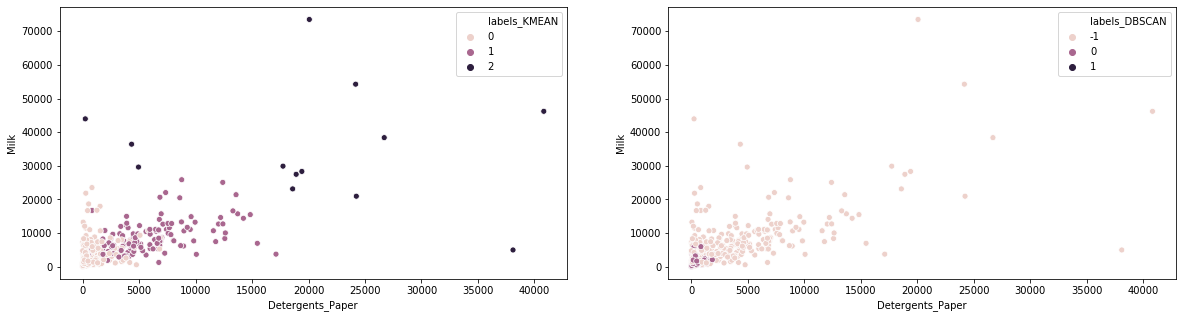

In [24]:
# Your code here:
X = customers.Detergents_Paper
y = customers.Milk

fig, ax =plt.subplots(1,2, figsize=(20,5))
sns.scatterplot(X,y, hue="labels_KMEAN", data = customers, ax = ax[0])
sns.scatterplot(X,y, hue="labels_DBSCAN", data = customers, ax = ax[1])

fig.show()

'''
KMEN seems a better model for clustering our data
'''

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


'\nKMEN seems a better model for clustering our data\n'

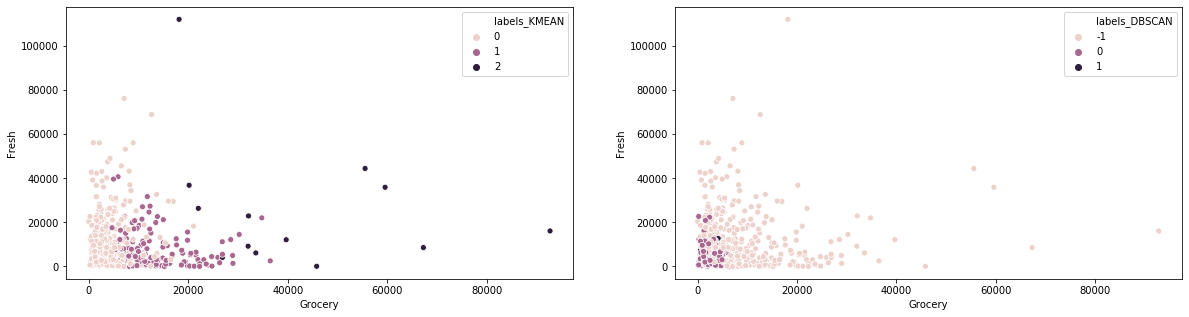

In [25]:
# Your code here:
X = customers.Grocery
y = customers.Fresh

fig, ax =plt.subplots(1,2, figsize=(20,5))
sns.scatterplot(X,y, hue="labels_KMEAN", data = customers, ax = ax[0])
sns.scatterplot(X,y, hue="labels_DBSCAN", data = customers, ax = ax[1])

fig.show()

'''
KMEN seems a better model for clustering our data still
'''

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


'\nKMEN seems a better model for clustering our data still\n'

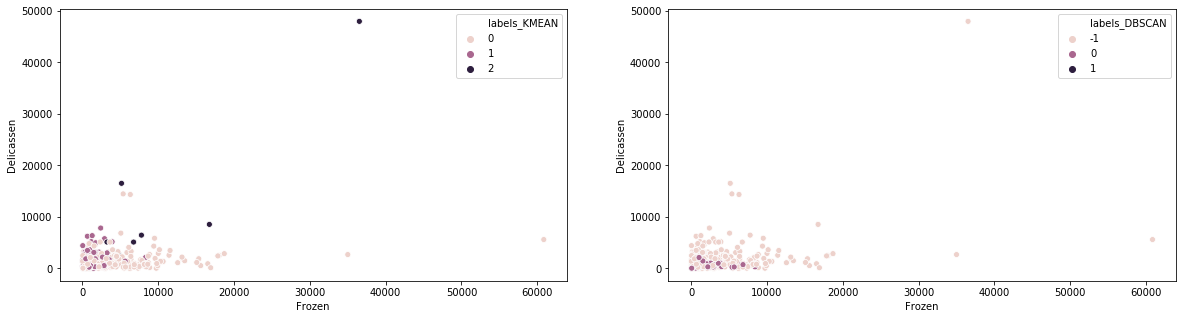

In [26]:
# Your code here:
X = customers.Frozen
y = customers.Delicassen

fig, ax =plt.subplots(1,2, figsize=(20,5))
sns.scatterplot(X,y, hue="labels_KMEAN", data = customers, ax = ax[0])
sns.scatterplot(X,y, hue="labels_DBSCAN", data = customers, ax = ax[1])

fig.show()

'''
Here it seems that none of the models did a great job
'''

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [29]:
# Your code here:
customer_KMEAN = customers.groupby("labels_KMEAN").agg("mean")
customer_KMEAN

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels_DBSCAN
labels_KMEAN,,,,,,,,,
0,1.003367,2.505051,13075.898990,3218.737374,3855.696970,3620.400673,776.875421,1242.249158,-0.565657
1,2.000000,2.623077,8165.915385,8748.515385,13905.492308,1441.630769,5991.146154,1535.007692,-1.000000
2,1.846154,2.615385,25770.769231,35160.384615,41977.384615,6844.538462,19867.384615,7880.307692,-1.000000


In [30]:
customer_DBSCAN = customers.groupby("labels_DBSCAN").agg("mean")
customer_DBSCAN

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels_KMEAN
labels_DBSCAN,,,,,,,,,
-1,1.440994,2.444099,13558.916149,7260.670807,10056.968944,3528.465839,3781.596273,1840.093168,0.484472
0,1.000000,3.000000,7782.233645,1797.074766,2235.345794,1876.560748,433.476636,684.373832,0.000000
1,1.000000,1.000000,7405.545455,1830.363636,1912.363636,1335.636364,345.545455,473.181818,0.000000


Which algorithm appears to perform better?

In [ ]:
# Your observations here
'''
Well now I don't know xD
Is it suppose to see which model is returning labels where the mean across each of the goods (Milk, Grocery, ect)
varies more? it means the clusters are more obvious and overlap less right?

If that's the case I believe the K_MEAN is doing a better job. I had already confirmed it with the scatter plots.
'''

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [35]:
# Your code here
for k in range(2,10):
    cluster = KMeans(n_clusters=k, random_state=0, n_jobs=-1)
model = cluster.fit(customers_scale)

In [ ]:
# Your comment here

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [ ]:
# Your code here

In [ ]:
# Your comment here